In [109]:
import torch
from os.path import expanduser
from torch.utils.data import DataLoader

from data import get_dataset
from model import VAE

train_dataset, test_dataset = get_dataset(in_memory=True)

train_loader = DataLoader(train_dataset, batch_size=32,
                          shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32,
                         shuffle=False)

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

model = VAE()
name = 'vae_e_42_loss_1.1013e+06.pkl'
model.load_state_dict(torch.load(expanduser('~/output/deep-fmri/%s' % name)))

model = model.to(device)
data = test_dataset[0][None, ...]
data = data.to(device)
recs = []
with torch.no_grad():
    for this_data in test_loader:
        this_data = this_data.to(device)
        rec, penalty = model(this_data)
        recs.append(rec)

In [110]:
recs_ = torch.cat(recs, dim=0)
data_ = torch.cat([this_data for this_data in test_loader])

In [111]:
%matplotlib inline

In [112]:
data = data_.to('cpu').numpy()
recs = recs_.to('cpu').numpy()

In [113]:
import matplotlib.pyplot as plt

data -= data.mean(axis=0, keepdims=True)
std_data = data.std(axis=0, keepdims=True)
std_data[std_data == 0] = 1
data /= std_data
recs -= recs.mean(axis=0, keepdims=True)
std_recs = recs.std(axis=0, keepdims=True)
std_recs[std_recs == 0] = 1
recs /= std_recs
std_recs = std_recs[0, 0, :, :, :]
std_data = std_data[0, 0, :, :, :]

(76, 51, 26)


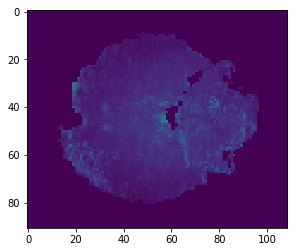

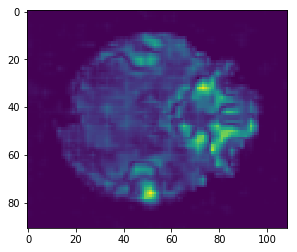

In [116]:
fig = plt.figure()
vmax = std_recs.max()
amax = np.unravel_index(np.argmax(std_recs), std_recs.shape)
print(amax)
plt.imshow(std_data[:, :, amax[2]], vmax=vmax)
fig = plt.figure()
plt.imshow(std_recs[:, :, amax[2]], vmax=vmax)    

In [106]:
recs[j, 0, :, :, amax[2]]

array([[-2.3287702e-01, -4.1684797e-01, -4.4755277e-01, ...,
         9.0366167e-01, -3.2782555e-07,  4.5923880e-01],
       [ 7.9635002e-02, -4.1516164e-01, -4.4310528e-01, ...,
         8.8471878e-01, -3.2782555e-07,  8.1666118e-01],
       [ 3.9162722e-01, -1.4205891e-01, -1.4193664e-01, ...,
        -1.6989465e-01, -3.2782555e-07,  1.0687934e+00],
       ...,
       [-9.5286943e-02, -9.4251812e-02, -9.4026424e-02, ...,
        -3.2782555e-07, -3.2782555e-07, -1.5820435e-01],
       [-3.8846907e-01, -1.7281127e-01, -2.6263386e-01, ...,
        -3.2782555e-07, -3.2782555e-07,  1.4571772e+00],
       [-3.9209875e-01, -1.7705023e-01, -2.7062935e-01, ...,
        -3.2782555e-07, -3.2782555e-07,  1.6263003e+00]], dtype=float32)

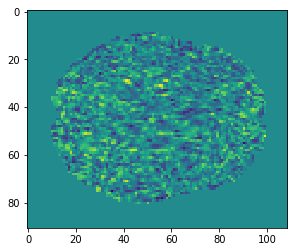

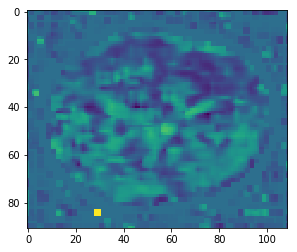

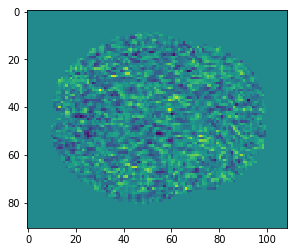

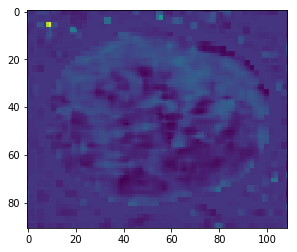

In [81]:
for j in [10, 250]:
    i = 40
    fig = plt.figure()
    plt.imshow(data[j, 0, :, :, i])
    fig = plt.figure()
    plt.imshow(recs[j, 0, :, :, i])